In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer
%matplotlib inline

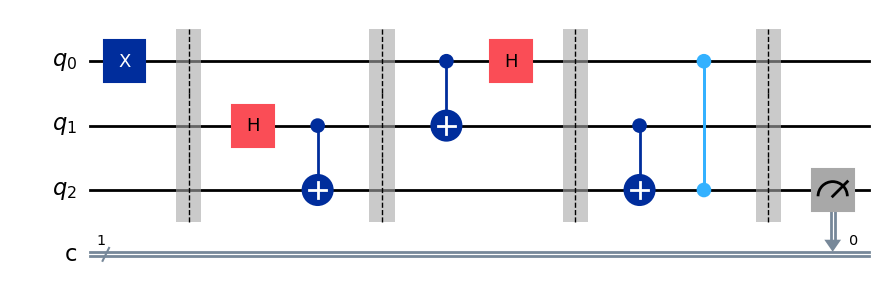

In [2]:
# quantum teleportation circuit using deferred measurement
circuit = QuantumCircuit(3, 1)

# initialize Olivia's qubit (quantum state to teleport)
circuit.x(0)
circuit.barrier()

# create Bell state pair
circuit.h(1)
circuit.cx(1, 2)
circuit.barrier()

# Olivia performs Bell state measurement
circuit.cx(0, 1)
circuit.h(0)
circuit.barrier()

# apply conditional operations on Barron's qubit
circuit.cx(1, 2)
circuit.cz(0, 2)
circuit.barrier()

# measure Barron's destination qubit
circuit.measure(2, 0)

circuit.draw(output='mpl')

In [8]:
from qiskit_ibm_provider import IBMProvider
from qiskit_ibm_provider.job import job_monitor
IBMProvider.save_account('<INSERT YOUR IBM QUANTUM API KEY>', overwrite=True)

provider = IBMProvider()

In [9]:
qcomp = provider.get_backend('ibmq_qasm_simulator')
job = qcomp.run(circuit)
job_monitor(job)

Job Status: job has successfully run


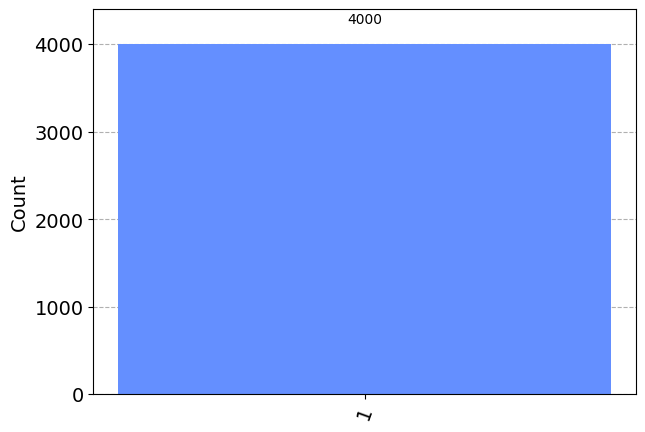

In [10]:
qcomp_result = job.result()
plot_histogram(qcomp_result.get_counts())